ML Assignment 5: Clustering Algorithms
Objective: Apply clustering techniques to the Iris dataset

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D

In [10]:
# Set random seed for reproducibility
np.random.seed(42)

In [12]:
# 1. Loading and Preprocessing
print("1. Loading and Preprocessing the Iris Dataset")
print("-" * 50)

1. Loading and Preprocessing the Iris Dataset
--------------------------------------------------


In [14]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
feature_names = iris.feature_names
target_names = iris.target_names

In [16]:
# Create a DataFrame for easier manipulation
df = pd.DataFrame(X, columns=feature_names)
df['species'] = [target_names[i] for i in iris.target]

In [18]:
print("First few rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

First few rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species   

In [20]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [22]:
# Drop the species column for clustering
X = df.drop('species', axis=1)
print("\nShape after dropping species column:", X.shape)


Shape after dropping species column: (150, 4)


In [24]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Data scaled using StandardScaler")

Data scaled using StandardScaler


In [26]:
# 2A. KMeans Clustering
print("\n2A. KMeans Clustering")
print("-" * 50)


2A. KMeans Clustering
--------------------------------------------------


In [28]:
print("""
KMeans Clustering Algorithm Description:
KMeans is a partitioning clustering algorithm that divides data into k clusters where each
observation belongs to the cluster with the nearest mean (cluster center or centroid).
The algorithm works through the following steps:
1. Initialize k centroids randomly
2. Assign each data point to the nearest centroid
3. Recalculate centroids based on the mean of all points assigned to that cluster
4. Repeat steps 2-3 until convergence (centroids no longer change significantly)

KMeans is suitable for the Iris dataset because:
1. The Iris dataset is relatively small and contains numeric features
2. The features exhibit some natural clustering that KMeans can identify
3. The dataset has a balanced distribution of instances across classes
4. We know there are three species of iris in the dataset, which gives us a starting point for choosing k=3
5. The features are on different scales, but we've addressed this with standardization
""")


KMeans Clustering Algorithm Description:
KMeans is a partitioning clustering algorithm that divides data into k clusters where each
observation belongs to the cluster with the nearest mean (cluster center or centroid).
The algorithm works through the following steps:
1. Initialize k centroids randomly
2. Assign each data point to the nearest centroid
3. Recalculate centroids based on the mean of all points assigned to that cluster
4. Repeat steps 2-3 until convergence (centroids no longer change significantly)

KMeans is suitable for the Iris dataset because:
1. The Iris dataset is relatively small and contains numeric features
2. The features exhibit some natural clustering that KMeans can identify
3. The dataset has a balanced distribution of instances across classes
4. We know there are three species of iris in the dataset, which gives us a starting point for choosing k=3
5. The features are on different scales, but we've addressed this with standardization



In [30]:
# Determine optimal number of clusters using the Elbow method
inertia = []
silhouette_scores = []
k_range = range(2, 11)

In [32]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    
    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled, labels))

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

In [34]:
# Plot the Elbow method results
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

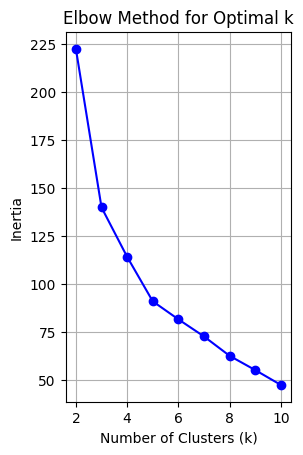

In [36]:
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

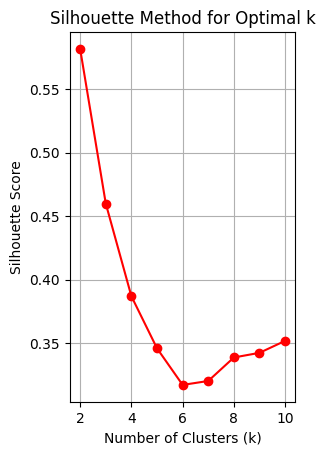

In [38]:
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid(True)

In [40]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [42]:
# Apply KMeans with the optimal number of clusters (we'll use k=3 since we know there are 3 species)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)
y_kmeans = kmeans.labels_

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [44]:
# Compare with actual species
df['kmeans_cluster'] = y_kmeans
print("\nCluster distribution:")
print(df.groupby(['species', 'kmeans_cluster']).size())


Cluster distribution:
species     kmeans_cluster
setosa      1                 50
versicolor  0                 39
            2                 11
virginica   0                 14
            2                 36
dtype: int64


In [46]:
# Visualize the clusters (using first two features)
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

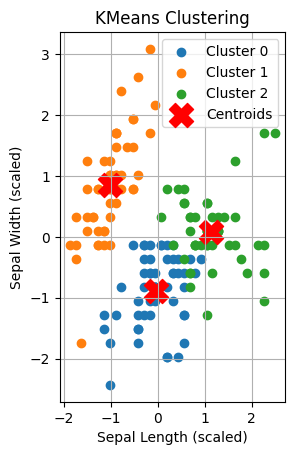

In [48]:
plt.subplot(1, 2, 1)
for i in range(3):
    plt.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], 
                label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.legend()
plt.grid(True)

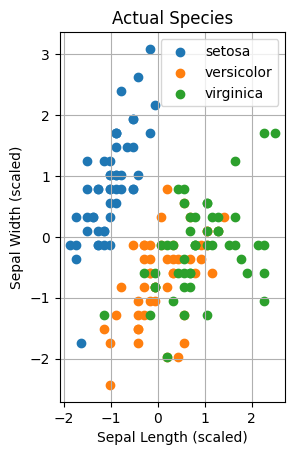

In [50]:
# Compare with actual species
plt.subplot(1, 2, 2)
for i, species in enumerate(target_names):
    plt.scatter(X_scaled[iris.target == i, 0], X_scaled[iris.target == i, 1], 
                label=species)
plt.title('Actual Species')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.legend()
plt.grid(True)

In [52]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [54]:
# 3D visualization with three features
fig = plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

In [56]:
# KMeans clusters
ax1 = fig.add_subplot(121, projection='3d')
for i in range(3):
    ax1.scatter(X_scaled[y_kmeans == i, 0], X_scaled[y_kmeans == i, 1], X_scaled[y_kmeans == i, 2],
                label=f'Cluster {i}')
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2],
            s=300, c='red', marker='X', label='Centroids')
ax1.set_title('KMeans Clustering (3D)')
ax1.set_xlabel('Sepal Length (scaled)')
ax1.set_ylabel('Sepal Width (scaled)')
ax1.set_zlabel('Petal Length (scaled)')
ax1.legend()

In [58]:
# Actual species
ax2 = fig.add_subplot(122, projection='3d')
for i, species in enumerate(target_names):
    ax2.scatter(X_scaled[iris.target == i, 0], X_scaled[iris.target == i, 1], X_scaled[iris.target == i, 2],
                label=species)
ax2.set_title('Actual Species (3D)')
ax2.set_xlabel('Sepal Length (scaled)')
ax2.set_ylabel('Sepal Width (scaled)')
ax2.set_zlabel('Petal Length (scaled)')
ax2.legend()

In [60]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [62]:
# 2B. Hierarchical Clustering
print("\n2B. Hierarchical Clustering")
print("-" * 50)


2B. Hierarchical Clustering
--------------------------------------------------


In [64]:
print("""
Hierarchical Clustering Algorithm Description:
Hierarchical clustering is a method that builds nested clusters by merging or splitting them
successively. This creates a tree-like structure called a dendrogram that shows the hierarchical
relationship between clusters. There are two approaches:

1. Agglomerative (bottom-up): Each data point starts as its own cluster, and pairs of clusters
   are merged as one moves up the hierarchy based on a linkage criterion.
   
2. Divisive (top-down): All data points start in one cluster, and splits are performed recursively
   as one moves down the hierarchy.

The most common approach is agglomerative, which uses different linkage methods:
- Single linkage: minimum distance between points in different clusters
- Complete linkage: maximum distance between points in different clusters
- Average linkage: average distance between points in different clusters
- Ward's method: minimizes the sum of squared differences within all clusters

Hierarchical clustering is suitable for the Iris dataset because:
1. It doesn't require a predefined number of clusters (we can determine this from the dendrogram)
2. It captures the natural hierarchy in the data
3. It works well for smaller datasets like Iris
4. It provides a clear visualization (dendrogram) of how clusters are formed
5. It allows us to see relationships between subclusters
""")


Hierarchical Clustering Algorithm Description:
Hierarchical clustering is a method that builds nested clusters by merging or splitting them
successively. This creates a tree-like structure called a dendrogram that shows the hierarchical
relationship between clusters. There are two approaches:

1. Agglomerative (bottom-up): Each data point starts as its own cluster, and pairs of clusters
   are merged as one moves up the hierarchy based on a linkage criterion.
   
2. Divisive (top-down): All data points start in one cluster, and splits are performed recursively
   as one moves down the hierarchy.

The most common approach is agglomerative, which uses different linkage methods:
- Single linkage: minimum distance between points in different clusters
- Complete linkage: maximum distance between points in different clusters
- Average linkage: average distance between points in different clusters
- Ward's method: minimizes the sum of squared differences within all clusters

Hierarchical clu

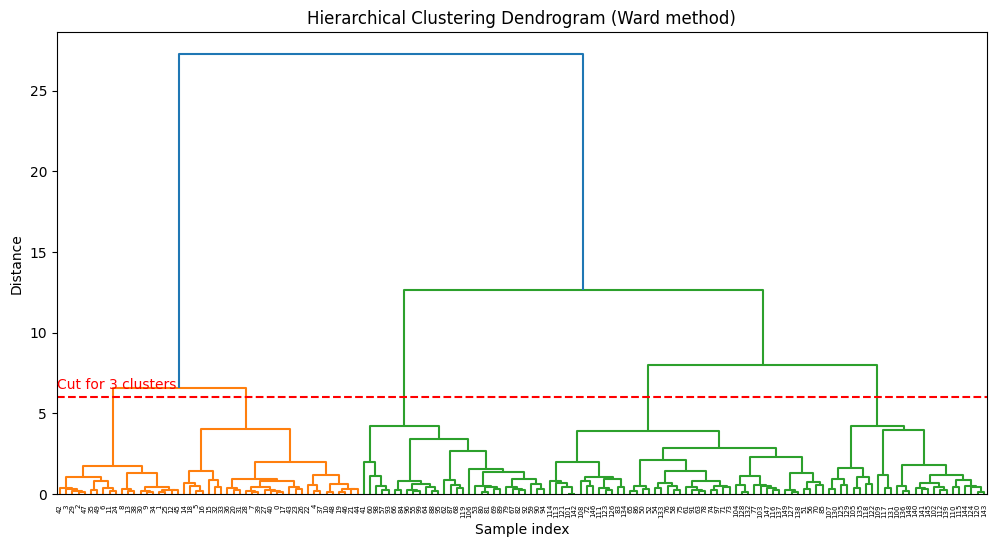

In [66]:
# Create a dendrogram to determine the optimal number of clusters
plt.figure(figsize=(12, 6))
dendrogram_linkage = linkage(X_scaled, method='ward')
dendrogram(dendrogram_linkage)
plt.title('Hierarchical Clustering Dendrogram (Ward method)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.axhline(y=6, color='r', linestyle='--')
plt.text(0, 6.5, 'Cut for 3 clusters', color='r')
plt.show()

In [68]:
# Apply Hierarchical Clustering with the optimal number of clusters
hierarchical = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_hierarchical = hierarchical.fit_predict(X_scaled)

In [70]:
# Compare with actual species
df['hierarchical_cluster'] = y_hierarchical
print("\nCluster distribution:")
print(df.groupby(['species', 'hierarchical_cluster']).size())


Cluster distribution:
species     hierarchical_cluster
setosa      1                       49
            2                        1
versicolor  0                       23
            2                       27
virginica   0                       48
            2                        2
dtype: int64


In [72]:
# Visualize the clusters (using first two features)
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

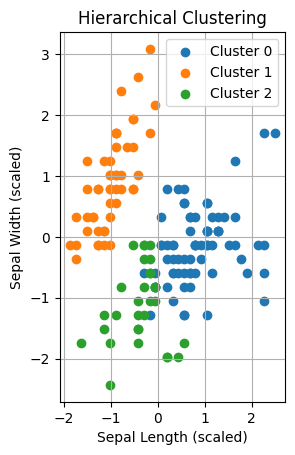

In [74]:
plt.subplot(1, 2, 1)
for i in range(3):
    plt.scatter(X_scaled[y_hierarchical == i, 0], X_scaled[y_hierarchical == i, 1], 
                label=f'Cluster {i}')
plt.title('Hierarchical Clustering')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.legend()
plt.grid(True)

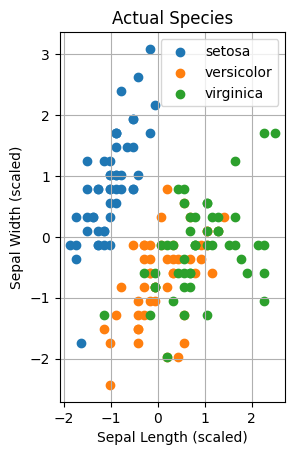

In [76]:
# Compare with actual species
plt.subplot(1, 2, 2)
for i, species in enumerate(target_names):
    plt.scatter(X_scaled[iris.target == i, 0], X_scaled[iris.target == i, 1], 
                label=species)
plt.title('Actual Species')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.legend()
plt.grid(True)

In [78]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [80]:
# 3D visualization with three features
fig = plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

In [82]:
# Hierarchical clusters
ax1 = fig.add_subplot(121, projection='3d')
for i in range(3):
    ax1.scatter(X_scaled[y_hierarchical == i, 0], X_scaled[y_hierarchical == i, 1], X_scaled[y_hierarchical == i, 2],
                label=f'Cluster {i}')
ax1.set_title('Hierarchical Clustering (3D)')
ax1.set_xlabel('Sepal Length (scaled)')
ax1.set_ylabel('Sepal Width (scaled)')
ax1.set_zlabel('Petal Length (scaled)')
ax1.legend()

In [84]:
# Actual species
ax2 = fig.add_subplot(122, projection='3d')
for i, species in enumerate(target_names):
    ax2.scatter(X_scaled[iris.target == i, 0], X_scaled[iris.target == i, 1], X_scaled[iris.target == i, 2],
                label=species)
ax2.set_title('Actual Species (3D)')
ax2.set_xlabel('Sepal Length (scaled)')
ax2.set_ylabel('Sepal Width (scaled)')
ax2.set_zlabel('Petal Length (scaled)')
ax2.legend()

In [86]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [88]:
# Compare KMeans and Hierarchical Clustering results
print("\nComparison of KMeans and Hierarchical Clustering:")
print("-" * 50)
print("Silhouette Score for KMeans:", round(silhouette_score(X_scaled, y_kmeans), 4))
print("Silhouette Score for Hierarchical:", round(silhouette_score(X_scaled, y_hierarchical), 4))


Comparison of KMeans and Hierarchical Clustering:
--------------------------------------------------
Silhouette Score for KMeans: 0.4599
Silhouette Score for Hierarchical: 0.4467


In [90]:
# Create a comparison table
comparison_df = pd.DataFrame()
comparison_df['Actual_Species'] = iris.target
comparison_df['KMeans_Cluster'] = y_kmeans
comparison_df['Hierarchical_Cluster'] = y_hierarchical

In [92]:
print("\nSample of clustering results comparison:")
print(comparison_df.head(10))


Sample of clustering results comparison:
   Actual_Species  KMeans_Cluster  Hierarchical_Cluster
0               0               1                     1
1               0               1                     1
2               0               1                     1
3               0               1                     1
4               0               1                     1
5               0               1                     1
6               0               1                     1
7               0               1                     1
8               0               1                     1
9               0               1                     1


In [94]:
print("\nCross-tabulation of KMeans vs Actual Species:")
kmeans_cross_tab = pd.crosstab(comparison_df['KMeans_Cluster'], 
                              comparison_df['Actual_Species'],
                              rownames=['KMeans Cluster'],
                              colnames=['Actual Species'])
print(kmeans_cross_tab)


Cross-tabulation of KMeans vs Actual Species:
Actual Species   0   1   2
KMeans Cluster            
0                0  39  14
1               50   0   0
2                0  11  36


In [96]:
print("\nCross-tabulation of Hierarchical vs Actual Species:")
hierarchical_cross_tab = pd.crosstab(comparison_df['Hierarchical_Cluster'], 
                                    comparison_df['Actual_Species'],
                                    rownames=['Hierarchical Cluster'],
                                    colnames=['Actual Species'])
print(hierarchical_cross_tab)


Cross-tabulation of Hierarchical vs Actual Species:
Actual Species         0   1   2
Hierarchical Cluster            
0                      0  23  48
1                     49   0   0
2                      1  27   2


In [98]:
print("\nCross-tabulation of KMeans vs Hierarchical Clustering:")
clustering_cross_tab = pd.crosstab(comparison_df['KMeans_Cluster'], 
                                  comparison_df['Hierarchical_Cluster'],
                                  rownames=['KMeans Cluster'],
                                  colnames=['Hierarchical Cluster'])
print(clustering_cross_tab)


Cross-tabulation of KMeans vs Hierarchical Clustering:
Hierarchical Cluster   0   1   2
KMeans Cluster                  
0                     24   0  29
1                      0  49   1
2                     47   0   0


In [100]:
print("\nConclusion:")
print("""
Both KMeans and Hierarchical Clustering performed well on the Iris dataset, identifying clusters that largely
correspond to the actual species. Based on the silhouette scores, both methods achieved good separation
between clusters.

Key observations:
1. Both clustering algorithms were able to clearly separate Setosa from the other two species
2. There was some overlap between Versicolor and Virginica in both clustering methods
3. The dendrogram from hierarchical clustering shows a clear separation at three clusters
4. Scaling the data was important as the features had different units and ranges
5. The 3D visualization shows better separation of clusters compared to the 2D plots

Overall, both clustering methods demonstrate the natural grouping present in the Iris dataset, which aligns
well with the actual species classification. This suggests that the morphological features used (sepal and
petal measurements) are effective for distinguishing between the different iris species.
""")


Conclusion:

Both KMeans and Hierarchical Clustering performed well on the Iris dataset, identifying clusters that largely
correspond to the actual species. Based on the silhouette scores, both methods achieved good separation
between clusters.

Key observations:
1. Both clustering algorithms were able to clearly separate Setosa from the other two species
2. There was some overlap between Versicolor and Virginica in both clustering methods
3. The dendrogram from hierarchical clustering shows a clear separation at three clusters
4. Scaling the data was important as the features had different units and ranges
5. The 3D visualization shows better separation of clusters compared to the 2D plots

Overall, both clustering methods demonstrate the natural grouping present in the Iris dataset, which aligns
well with the actual species classification. This suggests that the morphological features used (sepal and
petal measurements) are effective for distinguishing between the different iris spe